In [1]:
from tqdm import tqdm
import easyocr
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
list_path=os.listdir(r"scb")
list_path=["scb/"+i for i in list_path]
list_path

['scb/241829.jpg',
 'scb/328713184_526451809631674_587661103040484646_n.jpg',
 'scb/328788633_737021624619700_7136436083795179439_n.jpg',
 'scb/328789220_586622286687395_8428324264400853464_n.jpg',
 'scb/328853529_1573314806525869_2482575008636716417_n.jpg',
 'scb/328957066_121517870858000_1419853420818729236_n.jpg',
 'scb/332812217_3540970842855383_9030081013701826712_n.jpg',
 'scb/333900563_3416948481953434_6599585905694933179_n.jpg',
 'scb/333943514_1912613435748401_6031411110012322936_n.jpg',
 'scb/333964263_202499569126834_8114178338524467807_n.jpg',
 'scb/333979404_2845680645562971_3779615611478782554_n.jpg',
 'scb/333981965_709188807600612_5450488617004114299_n.jpg',
 'scb/LINE_ALBUM_slip_230227_101.jpg',
 'scb/LINE_ALBUM_slip_230227_104.jpg',
 'scb/LINE_ALBUM_slip_230227_114.jpg',
 'scb/LINE_ALBUM_slip_230227_13_0.jpg',
 'scb/LINE_ALBUM_slip_230227_164.jpg',
 'scb/LINE_ALBUM_slip_230227_168.jpg',
 'scb/LINE_ALBUM_slip_230227_173.jpg',
 'scb/LINE_ALBUM_slip_230227_182.jpg',
 'sc

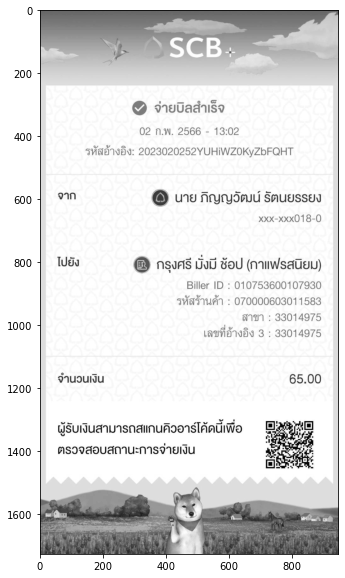

In [3]:
img = cv2.imread(list_path[0], 0)

# Apply Otsu's thresholding to the image
# ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the thresholded image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()

In [4]:
img = cv2.imread(list_path[0])

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize the OCR reader
reader = easyocr.Reader(['th,en'])

# Perform OCR on the image
ls = reader.readtext(gray, detail=0, paragraph=False)
ls

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['ร8',
 'จ่ายบิลสำเร็จ',
 '02 ก.พ. 2566',
 '13:02',
 ' รหัสอ้างอิง: 2023020252ขบ|:พ70&970}7',
 'จา',
 'นาย ภิญญวัฒน รัตนยรรยง',
 ' &&}-/)&018-0',
 'ไปยัง',
 'กรุงศรีมั่งมี ช้อป(กาแฟรสนิยม)',
 '8 ก',
 '010753600107930',
 ' รหัสร้านค้า',
 '070000603011583',
 'สาขา',
 '33014975',
 ' เลขที่อ้างอิง 3',
 '33014975',
 ' จำนวนเงิน',
 '65.00',
 'ผู้รับเงินสามารถสแกนคิวอาร์โค้ดนี้เพื่อ',
 'ตรวจสอบสถานะการจ่ายเงิน']

In [36]:
pattern_len = len('304918102451!00002389790')
pattern_len

24

In [12]:
#Test the bank slip logical
list_path=os.listdir(r"memo")
list_path=["memo/"+i for i in list_path]
list_path


 # Length of the pattern to match
check_list = []
img_list = []
for i in tqdm(range(0,9)):
    img = cv2.imread(list_path[i])

    # Convert the image to grayscale

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize the OCR reader
    reader = easyocr.Reader(['en'])

    ls = reader.readtext(gray, detail=0, paragraph=False)

    if sum(1 for w in ls if 'ารออม' in w) >= 1:
        for text in ls:
                    if pattern_len - 2 >= len(text) <= pattern_len:
                        check_list.append("1")
                        break
        check_list.append("1")
    else:
        check_list.append("0")
    img_list.append(ls)



100%|██████████| 9/9 [02:33<00:00, 17.09s/it]


In [13]:
# img_list[7]
check_list
# len('012045212258790754')

['0', '0', '0', '0', '0', '0', '0', '0', '0']

In [8]:
#Check with all bank slip
Bank_list = ['baac','bbk','kbank','krungsri','krungthai','memo','scb','ttb']

for i in Bank_list:
    list_path = os.listdir(i)
    list_path = [os.path.join(i, j) for j in list_path]
    reader = easyocr.Reader(['en'])

    check_list = []
    img_list = []

    for k in tqdm(range(0,7)):
        img = cv2.imread(list_path[k])
        if img is not None:  # check if image was loaded correctly
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ls = reader.readtext(gray, detail=0, paragraph=False)
            if 'ungsr' in ls[0] and sum(1 for w in ls if 'baym' in w.lower()) >= 1:
                check_list.append("1")
            else:
                check_list.append("0")
            img_list.append(ls)
        else:
            print(f"Error loading image: {list_path[k]}")
    print(f'check_list_{i}' , check_list)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 7/7 [00:41<00:00,  5.92s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_baac ['0', '0', '0', '0', '0', '0', '0']


  0%|          | 0/7 [00:01<?, ?it/s]


KeyboardInterrupt: 